# Suicides Data Analysis in India

**This is My Course i.e; Data Analysis with Python: Zero to Pandas, Final Course Project on Exploratory Data Analysis.** 

In this project, I will attempt to provide an explanation for what is probably the specific motives because of which human beings dedicated suicide in India (the usage of the dataset "Suicides in India").

Almost 11,89,068 human beings dedicated suicide in 2012 alone, it's miles pretty crucial to apprehend why they dedicate suicide and attempt to mitigate.

# What is suicide and suicidal behavior?

1. **Suicide** is the *act of taking one’s own life* & **Suicidal behavior** refers to talking about or taking actions related to ending one’s own life.

2. Close to **800 000 people** die by suicide **every year**. Furthermore, for each suicide, there are more than **20 suicide** attempts.

3. If you or someone you know is exhibiting either, you should seek **immediate assistance** from a healthcare provider.

4. Suicides are **preventable**. Much can be done to **prevent suicide** at individual, community and national levels. 


If you're having suicidal thoughts, please call suicide helpline! 

In [2]:
!pip install numpy pandas seaborn plotly torchvision
!pip install matplotlib --upgrade 

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.2)


In [3]:
# First import packages

!pip install jovian --upgrade --quiet
import numpy as np     #library for mathematical operations
import pandas as pd    #library for data manipulation and analysis
import matplotlib      #library for creating interactive visualizations
import matplotlib.pyplot as plt
import seaborn as sns  #library for data visualization based on matplotlib
import torchvision
from torchvision.datasets.utils import download_url

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py    #Plotly is a free and open-source graphing library for Python
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

In [4]:
project_name = 'suicide_in_india_2020'

In [5]:
# read csv file 
DATASET_URL = "https://thecleverprogrammer.com/wp-content/uploads/2020/05/suicides.csv"
DATA_FILENAME = "suicides.csv"
download_url(DATASET_URL, '.')

Using downloaded and verified file: ./suicides.csv


In [6]:
df_data = pd.read_csv(DATA_FILENAME)

In [7]:
df_data.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


Some Insights of Our Dataset

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


Lets's Check is there any duplicate values

In [9]:
df_data.duplicated().any()

False

Let’s check if there is any missing values in the data set

In [10]:
df_data.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

# 1. Total Number of People Committed Suicide Every Year?

In [11]:
print("Total cases from 2001-12: \n",df_data.groupby("Year")["Total"].sum())

Total cases from 2001-12: 
 Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64


<AxesSubplot:xlabel='Year'>

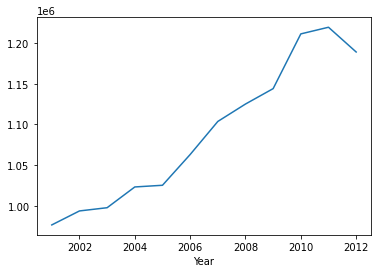

In [12]:
df_data.groupby("Year")["Total"].sum().plot(kind="line")

Every Year Analysis 

In [13]:
trace1 = go.Bar(
    x = df_data['Year'].unique(),
    y = df_data.groupby('Year').sum()['Total']
)

layout = go.Layout()
fig = go.Figure(data = trace1, layout = layout)

fig.update_layout(
    title="Yearwise suicide",
    xaxis_title="Year",
    yaxis_title="Suicide Count",
)
fig.update_yaxes(tickangle=-30, tickfont=dict(size=6))

iplot(fig)

# 2. Which Gender Commit More Number of Suicides?

In Indai, The Number of Male Commit Suicides are More Compared to Female.

In [14]:
df = px.data.tips()
fig = px.histogram(df_data, x="Gender", y='Total',color = 'Gender',
                   color_discrete_sequence=['Pink','Blue'],
                   marginal=None, # or violin, rug
                  )

fig.update_layout(
    title="Gender-wise Overview",
    xaxis_title="Gender",
    yaxis_title="Total count",
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# 3. Which States Commited More Suicides?

Acc to our dataset, Maharashtra People Commited More Suicides.

In [15]:
df_data_states = df_data.groupby(['State']).agg({'Total':'sum','Year':'count'})
df_data_states.rename(columns = {'Year':'Cases Type Count'}, inplace = True)

In [16]:
trace1 = go.Bar(
    x = df_data_states.sort_values(by = ['Total'],ascending = False).index,
    y = df_data_states.sort_values(by = ['Total'],ascending = False)['Total']
)

layout = go.Layout()
fig = go.Figure(data = trace1, layout = layout)

fig.update_layout(
    title="Statewise Suicide Number",
    xaxis_title="State",
    yaxis_title="Suicide Count",
)

iplot(fig)

**Let's see some amazing visualization using word cloud.**

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [18]:
df_data = df_data[(df_data["State"]!="Total (States)")&(df_data["State"]!="Total (Uts)")&(df_data["State"]!="Total (All India)") ]
df_data["State"].value_counts()

Maharashtra          6792
Karnataka            6792
Madhya Pradesh       6792
Rajasthan            6791
Odisha               6791
Andhra Pradesh       6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Delhi (Ut)           6782
Tripura              6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: State, dtype: int64

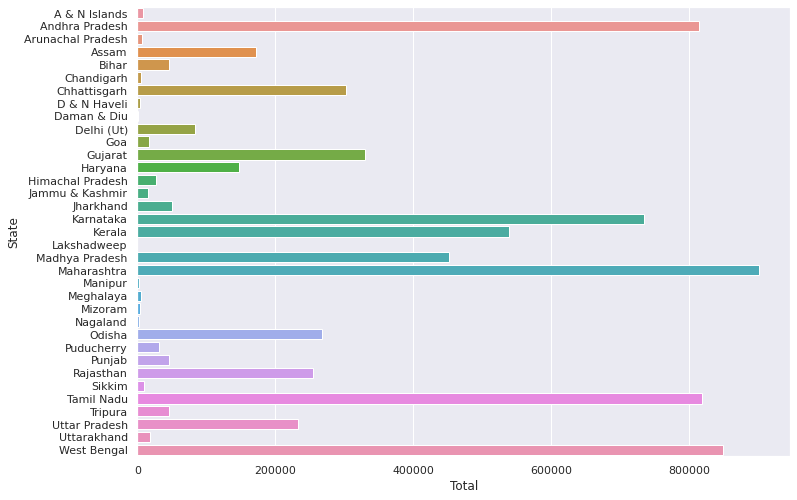

In [19]:
filter_state = pd.DataFrame(df_data.groupby(["State"])["Total"].sum()).reset_index()
sns.barplot(y = 'State', x = 'Total',data = filter_state, edgecolor = 'w')
plt.show()

In [20]:
df_data["State"].value_counts()

Maharashtra          6792
Karnataka            6792
Madhya Pradesh       6792
Rajasthan            6791
Odisha               6791
Andhra Pradesh       6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Delhi (Ut)           6782
Tripura              6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: State, dtype: int64

**Big Font means Higher Number of Suicides Committed**

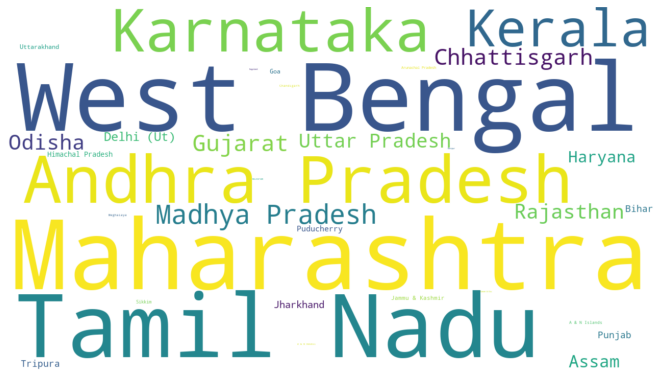

In [21]:
from wordcloud import WordCloud
count = {}
for x in filter_state["State"].values:
    count[x]=int(filter_state[filter_state["State"]==x].Total)


wordcloud = WordCloud(width=1280,height=720,background_color='white').generate_from_frequencies(count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4. Which Age Groups Committed Maximum Number of Suicides?

**From the dataset, the youngsters (15-29 age) and middle age (30-44) are committed the maximum number of suicides.**

In [22]:
import plotly.express as px

df = px.data.tips()
fig = px.histogram(df_data, x="Age_group", y='Total',
                   color_discrete_sequence=['red','lightblue'],
                   marginal="violin", # or violin, rug
                  )

fig.update_layout(
    title="Suicide Cause",
    xaxis_title="Age Group",
    yaxis_title="Total Suicide Count",
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Visualization Age Vs Gender.

In [23]:
import plotly.express as px

fig = px.histogram(df_data, x="Age_group", y="Total", color="Gender",
                   color_discrete_sequence=['pink','blue'],
                   marginal="violin", # or violin, rug
                  )

fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Suicide count",
)
fig.update_yaxes(tickangle=-30, tickfont=dict(size=7.5))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# 5. What was the Social Causes For Commit Suicides?

In [24]:
df_data['Type'].unique()

df_data['Type'].replace({'Others (Please Specify)':'Unspecified',
                      'Causes Not Known':'Unspecified',
                       'Causes Not known':'Unspecified',
                       'Other Causes (Please Specity)':'Unspecified',
                       'By Other means (please specify)':'Unspecified',
                       'By Other means' : 'Unspecified',
                       'Unemployment':'Unemployed'
                      },inplace = True)
fig = px.histogram(df_data, x="Total", y="Type", color = 'Gender',
                   marginal="violin", # or violin, rug,
                   color_discrete_sequence=['pink','blue'],
                   )

fig.update_layout(
    title="Suicide Cause",
    xaxis_title="Total Suicide Count",
    yaxis_title="Suicide Cause/Method",
)
fig.update_yaxes(tickangle=-30, tickfont=dict(size=8.5))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# 6. What was the Relationship Status of People Who Commited Suicides?

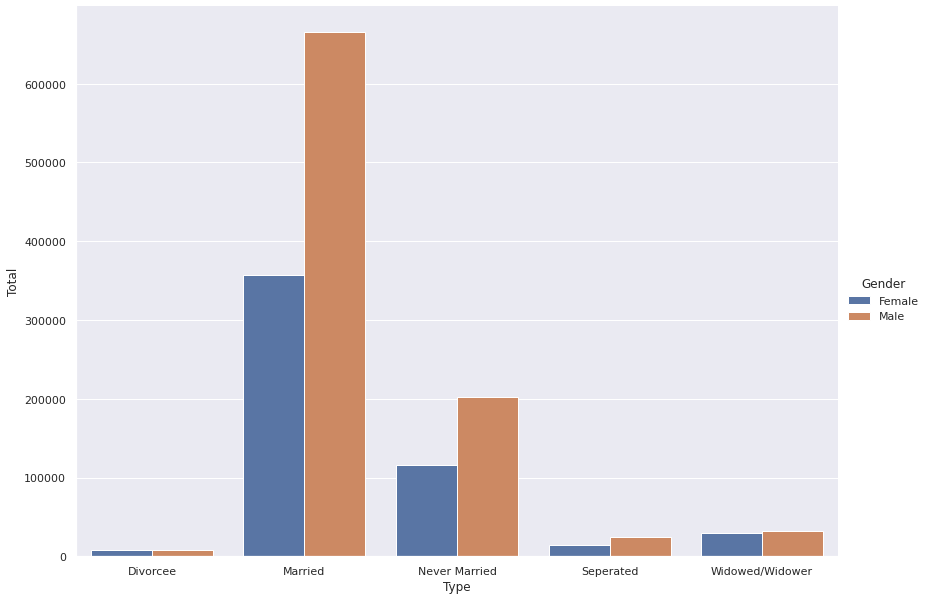

In [25]:
filter_social_status = pd.DataFrame(df_data[df_data["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);

# 7. What was the profession of the people who committed suicides?

The people whose profession are Farmers and housewives committed more suicide compared to others.

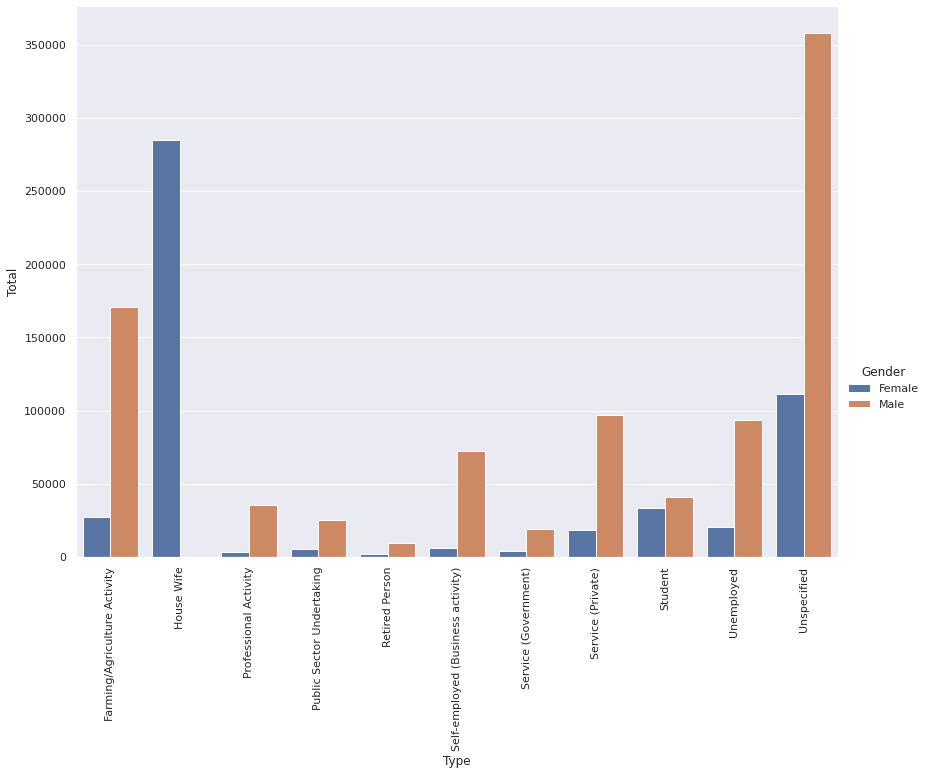

In [26]:
filter_social_status = pd.DataFrame(df_data[df_data["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=8.27, aspect=11.7/8.27);
g.set_xticklabels(rotation=90)

# According to our data set –

* Males tend to commit more suicides compared to Females in India
* Highest no. of suicide cases occur in Maharashtra, West Bengal, and Andhra Pradesh.
* Male might commit more suicide compared to females in the future if this trend continues.


**Using Placard**

# 8. Total Summary of Male Who Committed Suicides in India?

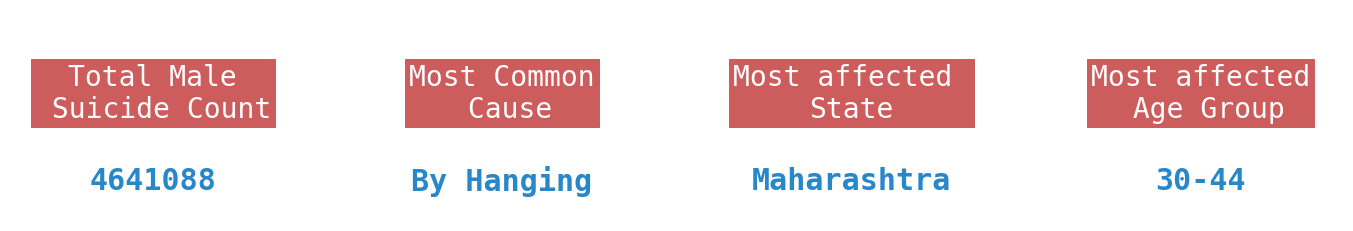

In [27]:
col = ['Total Male\n Suicide Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [df_data.groupby('Gender').sum()['Total']['Male'],'By Hanging','Maharashtra','30-44']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=28,
            color='white', backgroundcolor='indianred')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=30, fontweight='bold',
            color='#2887C8', backgroundcolor='white')
    
    axes[ind].set_axis_off()

# 9. Total Summary of Female Who Committed Suicides in India?

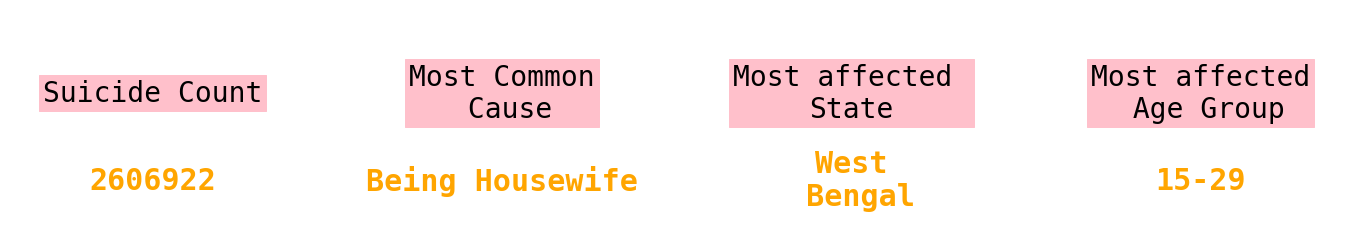

In [28]:
col = ['Suicide Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [df_data.groupby('Gender').sum()['Total']['Female'],'Being Housewife','West\n Bengal','15-29']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=28,
            color='black', backgroundcolor='pink')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=30, fontweight='bold',
            color='Orange', backgroundcolor='white')
    
    axes[ind].set_axis_off()

# 10. Total Summary of People Who Committed Suicides in India?

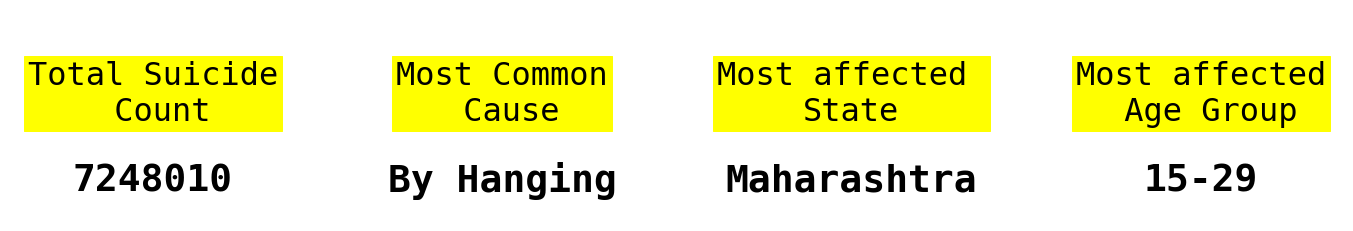

In [29]:
col = ['Total Suicide\n Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [df_data.groupby('Gender').sum()['Total']['Female'] + df_data.groupby('Gender').sum()['Total']['Male'],'By Hanging','Maharashtra','15-29']
color_val = ['lightblue','lightblue','lightblue','lightblue']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=32,
            color='black', backgroundcolor='yellow')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=38, fontweight='bold',
            color='black', backgroundcolor='white')
    
    axes[ind].set_axis_off()


# People who commit suicide are mostly:
* Married
* Farmers and housewives
* Youngsters (15-29 age) and middle age (30-44)


# Future Work
The dataset for suicides in India only consisted of 2001-2012 only. Only 12 years are considered in this project for the analysis. For data related to after 2012 is still missing if somehow we can collect all data we definitely find the common reasons for suicides and will try to stop also.



# References
Check out the various resource used in this project:

* Numpy Documentation: https://numpy.org/devdocs/user/quickstart.html
* User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html
* Seaborn gallery: https://seaborn.pydata.org/examples/index.html
* Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html
* Suicides in India dataset https://www.kaggle.com/rajanand/suicides-in-india

In [30]:
import jovian
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/rksensational/suicide-in-india-2020


'https://jovian.ml/rksensational/suicide-in-india-2020'